## MS Example 1

In [1]:
import numpy as np
import dfo as dfo
import ECNoise as ECN
import active_subspaces as ac
import matplotlib.pyplot as plt

We choose $\mathbf{x}^{(0)}=(100,0.1,u,u,\ldots,u)$, $u \sim U[-100,100]$.

In [2]:
dim=10
xinit=200*np.random.rand(dim)
print(np.shape(xinit))

#my nasty initial condition, but all others will plateau
xinit[0]=100
xinit[1]=.1
print(np.transpose(xinit))

(10,)
[1.00000000e+02 1.00000000e-01 8.47790217e+01 1.34955931e+02
 1.69219405e+02 1.46026044e+02 1.26105310e+02 1.11455306e+02
 1.17191512e+02 1.67304086e+02]


We let $t: \mathbf{x}: \mathbb{R}^{10} \to \mathbb{R}$, where $t(\mathbf{x})=x_1^2+x_2^2+x_3^2+ k\epsilon$, where $\epsilon \sim N(0,1)$ so that $k\epsilon \sim N(0,k^2)$ and $L_1=2$. Note if we let $x[0]=2*x[0]$ as is commented out below, we would get $L_1=8.$

In [3]:
k=1E-4
def tfun(x,var=k):
    y=np.copy(x)
    #y[0]*=2
    return np.dot(y[0:3],y[0:3])+(k**.5)*np.random.randn(1)

# Print check
print(xinit)
print(tfun(xinit))
print(xinit)

[1.00000000e+02 1.00000000e-01 8.47790217e+01 1.34955931e+02
 1.69219405e+02 1.46026044e+02 1.26105310e+02 1.11455306e+02
 1.17191512e+02 1.67304086e+02]
[17187.49428532]
[1.00000000e+02 1.00000000e-01 8.47790217e+01 1.34955931e+02
 1.69219405e+02 1.46026044e+02 1.26105310e+02 1.11455306e+02
 1.17191512e+02 1.67304086e+02]


In [14]:
M=10 # number of ECNoise f evals

noise_array=ECN.ECNoise(tfun,xinit,M)
mynoise=noise_array[0][0]
print(noise_array)
gen_f_vals=noise_array[1]
print(noise_array, mynoise)
print(gen_f_vals)


0.9999999999999999
[array([9.70560396e-05]), array([17187.49730904, 17199.18971583, 17210.88891281, 17222.6137504 ,
       17234.30732016, 17246.03261702, 17257.74997783, 17269.48172971,
       17281.23253617, 17292.9716003 ])]
[array([9.70560396e-05]), array([17187.49730904, 17199.18971583, 17210.88891281, 17222.6137504 ,
       17234.30732016, 17246.03261702, 17257.74997783, 17269.48172971,
       17281.23253617, 17292.9716003 ])] 9.705603956164517e-05
[17187.49730904 17199.18971583 17210.88891281 17222.6137504
 17234.30732016 17246.03261702 17257.74997783 17269.48172971
 17281.23253617 17292.9716003 ]


In [15]:
print('estimated noise var is', mynoise, 'true var is', k, 'with relative error', (mynoise-k)/k)

estimated noise var is 9.705603956164517e-05 true var is 0.0001 with relative error -0.02943960438354839


In [16]:
h=1/M
fm=gen_f_vals[0]
f0=gen_f_vals[1]
fp=gen_f_vals[2]
L_1_hat=abs(fp-2*f0+fm)*(1/h)**2

d1=abs(fp-f0)*(1/h)
d2=abs(fm-f0)*(1/h)
L_1_hat_1=abs(d1-d2)*(1/h)


print('estimated upper bound on ||f''|| is', L_1_hat, 'estimated value of L_1 from FD is', L_1_hat_1)

estimated upper bound on ||f|| is 0.6790189687308157 estimated value of L_1 from FD is 0.6790189687308157


In [17]:
mu_star=dfo.get_mu_star(mynoise,L_1_hat,dim)
h=dfo.get_h(L_1_hat,dim)

In [18]:
x=np.copy(xinit)
maxit=700
xhist=np.array(x)
fhist=np.array(tfun(x))
yhist=xhist
ghist=fhist
L1Bhist=np.array(L_1_hat)
for i in range(maxit):
    #[x,f,y,fy,p,q,L1B]=dfo.STARS(x,tfun,mu_star,h)
    [x,f,y,fy]=dfo.STARS(x,tfun,mu_star,h)
    xhist=np.vstack((xhist,x))
    fhist=np.hstack((fhist,f))
    yhist=np.vstack((yhist,y))
    ghist=np.hstack((ghist,fy))
    #L1Bhist=np.vstack((L1Bhist,L1B))

In [19]:
print('our algorithm terminates with x value',np.transpose(x), 'which has f value',f)

our algorithm terminates with x value [-3.47009278e-02 -3.68200392e-02  1.36537282e-02  2.08978727e+02
  1.50694934e+02  1.67304503e+02  1.15768207e+02  7.44576357e+01
  8.48187278e+01  1.58389977e+02] which has f value [-0.00198107]


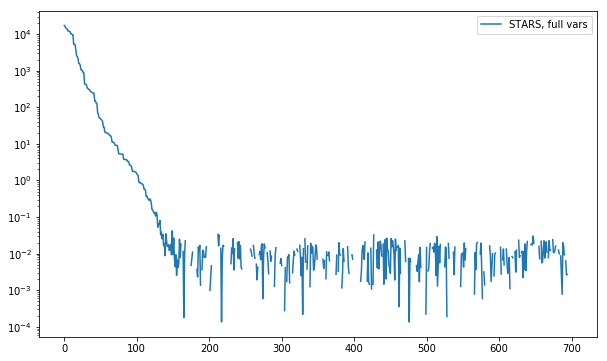

In [20]:
plt.figure(figsize=(10,6))
plt.semilogy(fhist,label='STARS, full vars')
plt.legend()
plt.show()

In [21]:
print(np.shape(xhist),np.shape(fhist),np.shape(yhist),np.shape(ghist))

(701, 10) (701,) (701, 10) (701,)


(70, 10) (70, 1)
n should be an integer. Performing conversion.
[[ 0.26742143  0.1744851   0.73704259]
 [ 0.11917841  0.59535744 -0.51395331]
 [-0.06138748 -0.60712247 -0.23633153]
 [-0.10954179  0.15786122  0.19249922]
 [ 0.21682903 -0.01587606 -0.08596762]
 [-0.45856248 -0.27208244  0.13852113]
 [ 0.08337032  0.11278674  0.17830521]
 [-0.64236494  0.28204037 -0.04747484]
 [-0.36391374  0.23452452  0.13755704]
 [-0.29866963  0.00602691  0.14200207]]
(10,)
(110, 10) (110, 1)
n should be an integer. Performing conversion.
[[ 5.27780934e-01  4.42482915e-01  2.67377933e-01]
 [-1.08330233e-01  2.73782611e-02  9.43881645e-01]
 [-2.51131557e-01  8.96237963e-01 -1.62104960e-01]
 [ 4.01207629e-01 -1.95781113e-04 -4.96828356e-02]
 [-2.01567830e-01 -2.72948807e-03  1.42673380e-02]
 [-6.12361697e-02 -8.16985592e-04  1.37779673e-02]
 [ 3.83536624e-02 -3.34950147e-03 -1.98124894e-02]
 [-4.78732781e-01 -7.09950020e-04  3.82783211e-02]
 [ 3.64459557e-01 -8.59915662e-03 -5.61352711e-02]
 [-2.78946089e

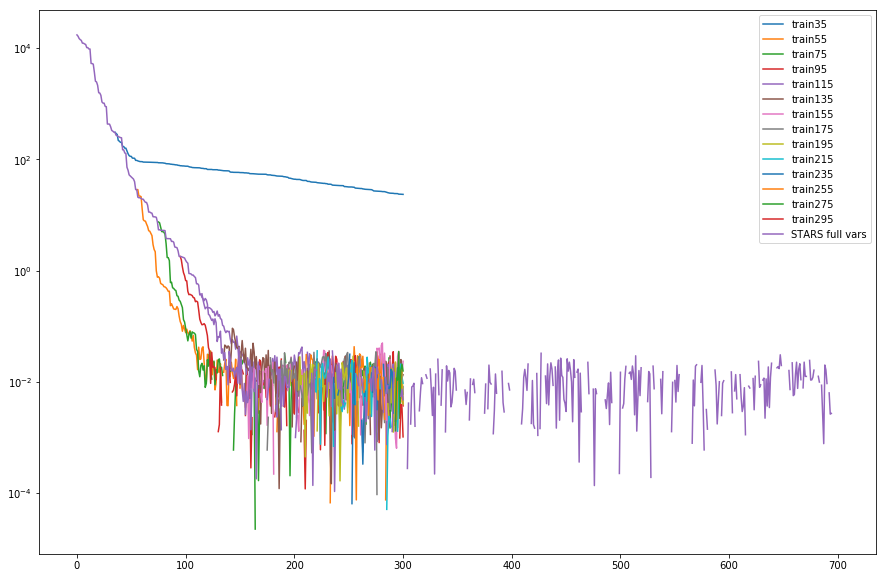

In [22]:
plt.figure(figsize=(15,10))
ss = ac.subspaces.Subspaces()
mu_star=dfo.get_mu_star(mynoise,L_1_hat,3)
h=dfo.get_h(L_1_hat,3)

for tr_stop in range(35,300,20):

    trainx=np.vstack((xhist[0:tr_stop],yhist[0:tr_stop]))
    trainf=np.hstack((fhist[0:tr_stop],ghist[0:tr_stop]))
    #trainx=np.transpose(trainx)
    trainf=np.reshape(trainf,(trainf.size,1))
    print(trainx.shape,trainf.shape)


    # Use Local Linears
    #df = ac.gradients.local_linear_gradients(x_hist, f_hist) #Estimated gradients using local linear models
    #ss.compute(df=df, nboot=0)
    
    # Use Global Quadratic
    ss.compute(X=trainx, f=trainf, nboot=0, sstype='QPHD')

    sub=ss.eigenvecs[:,0:3]
    print(sub)
    #sub=ss.eigenvecs
 
    x4=xhist[tr_stop-1,:]
    print(x4.shape)
    xhist4=np.array(x4)
    fhist4=np.array(tfun(x4))

    active=sub.transpose()
    #print(sub)

    for i in range(0,300-tr_stop):
        [x4,f,temp,temp2]=dfo.STARS(x4,tfun,mu_star,h,active=active)
        xhist4=np.hstack((xhist4,x4))
        fhist4=np.vstack((fhist4,f))
    plt.semilogy(range(tr_stop,301),fhist4,label='train'+str(tr_stop))


plt.semilogy(fhist, label='STARS full vars')
plt.legend()
plt.show()

In [13]:
mu_star=dfo.get_mu_star(1E-4,2,3)
h=dfo.get_h(2,3)
x3=np.copy(xinit)
xhist3=np.array(x3)
fhist3=np.array(tfun(x3))
active=np.eye(dim)
active=np.transpose(active[0:4,:])
for i in range(180):
    [x3,f,temp1,temp2, p ,q,L1B]=dfo.STARS(x3,tfun,mu_star,h,active=active)
    xhist3=np.hstack((xhist3,x3))
    fhist3=np.vstack((fhist3,f))

ValueError: operands could not be broadcast together with shapes (10,) (4,) 

In [ ]:
plt.figure(figsize=(15,10))

plt.semilogy(fhist, label='STARS full vars')
plt.semilogy(fhist3, label='STARS true active vars with true hyperparams')
plt.legend()
plt.show()